In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filenames = ['../cm-results/als_sparse_13-01-2021_09-10-31.json']
data = {}
for filename in filenames:
    with open(filename, 'r') as f:
        data[filename.split('_')[1]] = json.load(f)

In [4]:
data['sparse'].keys()

dict_keys(['avg_iter_time', 'total_convergence_time', 'avg_fun_eval_time', 'num_iterations', 'grad_u_norm', 'theta_diff_norm', 'mse', 'fun_evals', 'grad_theta', 'number_of_ratings', 'dataset_path', 'grad_sensibility', 'theta_diff_sensibility', 'num_experiments', 'warmup_cycles', 'experiments_total_runtime', 'date', 'train_mse', 'test_mse'])

In [13]:
data['sparse']['fun_evals']

{'1': [31064533.033750065,
  27684439.029329196,
  27626252.039181076,
  27623622.406254184,
  27623455.10906057,
  27623433.684147526,
  27623427.76594903,
  27623425.36997424,
  27623424.26116887,
  27623423.723860268,
  27623423.45951484,
  27623423.32896875,
  27623423.264512196,
  27623423.23273032,
  27623423.21708261,
  27623423.209388256,
  27623423.20560848,
  27623423.203753073,
  27623423.20284279,
  27623423.202396322,
  27623423.20217736,
  27623423.202070054,
  27623423.20201751,
  27623423.201991737,
  27623423.201979134,
  27623423.201972857,
  27623423.20196984,
  27623423.20196839,
  27623423.20196767,
  27623423.201967288,
  27623423.201967094,
  27623423.201966997,
  27623423.201966997,
  27623423.201966967,
  27623423.201966934,
  27623423.201966938,
  27623423.20196696,
  27623423.20196693,
  27623423.201966904,
  27623423.201966956,
  27623423.201966938,
  27623423.20196691,
  27623423.201966908,
  27623423.201966967,
  27623423.201966915,
  27623423.201966915,
 

In [17]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
def plot(y):
    plt.figure(figsize=(12, 8))
    plt.plot(y)
   

In [37]:
d = np.array(data['sparse']['fun_evals']['10'], dtype=np.float64)
diff =d[:-1]-d[-1]
print(diff, d[-1], len(diff))
diff = diff[diff>0]
print(diff, len(diff))
np.log(d[:-1]-d[-1])

[ 3.09614542e+06  5.44265828e+04  4.11646894e+03  5.68166763e+02
  1.10735171e+02  2.55173112e+01  6.77986075e+00  2.12974298e+00
  7.92589888e-01  3.35761078e-01  1.53660666e-01  7.31164142e-02
  3.54147144e-02  1.72840431e-02  8.46109539e-03  4.14655358e-03
  2.03271955e-03  9.96496528e-04  4.88527119e-04  2.39409506e-04
  1.17402524e-04  5.75408340e-05  2.81818211e-05  1.38282776e-05
  6.79492950e-06  3.37883830e-06  1.68010592e-06  8.19563866e-07
  4.17232513e-07  2.42143869e-07  9.68575478e-08  4.09781933e-08
  3.35276127e-08  0.00000000e+00  4.09781933e-08  6.33299351e-08
  1.11758709e-08  5.96046448e-08  5.21540642e-08  5.58793545e-08
  1.11758709e-08  2.60770321e-08  3.72529030e-08  1.49011612e-08
  7.45058060e-09 -7.45058060e-09  2.60770321e-08  2.98023224e-08] 27623423.20196691 48
[3.09614542e+06 5.44265828e+04 4.11646894e+03 5.68166763e+02
 1.10735171e+02 2.55173112e+01 6.77986075e+00 2.12974298e+00
 7.92589888e-01 3.35761078e-01 1.53660666e-01 7.31164142e-02
 3.54147144e-02

/home/nick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/nick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


array([ 14.94566848,  10.90460797,   8.32275102,   6.34241497,
         4.7071415 ,   3.23935709,   1.91395656,   0.75600131,
        -0.23244936,  -1.09135545,  -1.87300857,  -2.61570239,
        -3.34062789,  -4.05797157,  -4.77227663,  -5.48547775,
        -6.1983807 ,  -6.9112649 ,  -7.62411557,  -8.33733506,
        -9.04990215,  -9.76301571, -10.47683343, -11.18879496,
       -11.89933389, -12.59797861, -13.29665372, -14.01449351,
       -14.68962218, -15.23373379, -16.15002452, -17.01022578,
       -17.21089648,         -inf, -17.01022578, -16.57490771,
       -18.30950877, -16.63553233, -16.76906373, -16.70007085,
       -18.30950877, -17.46221091, -17.10553596, -18.02182669,
       -18.71497388,          nan, -17.46221091, -17.32867951])

([], [])

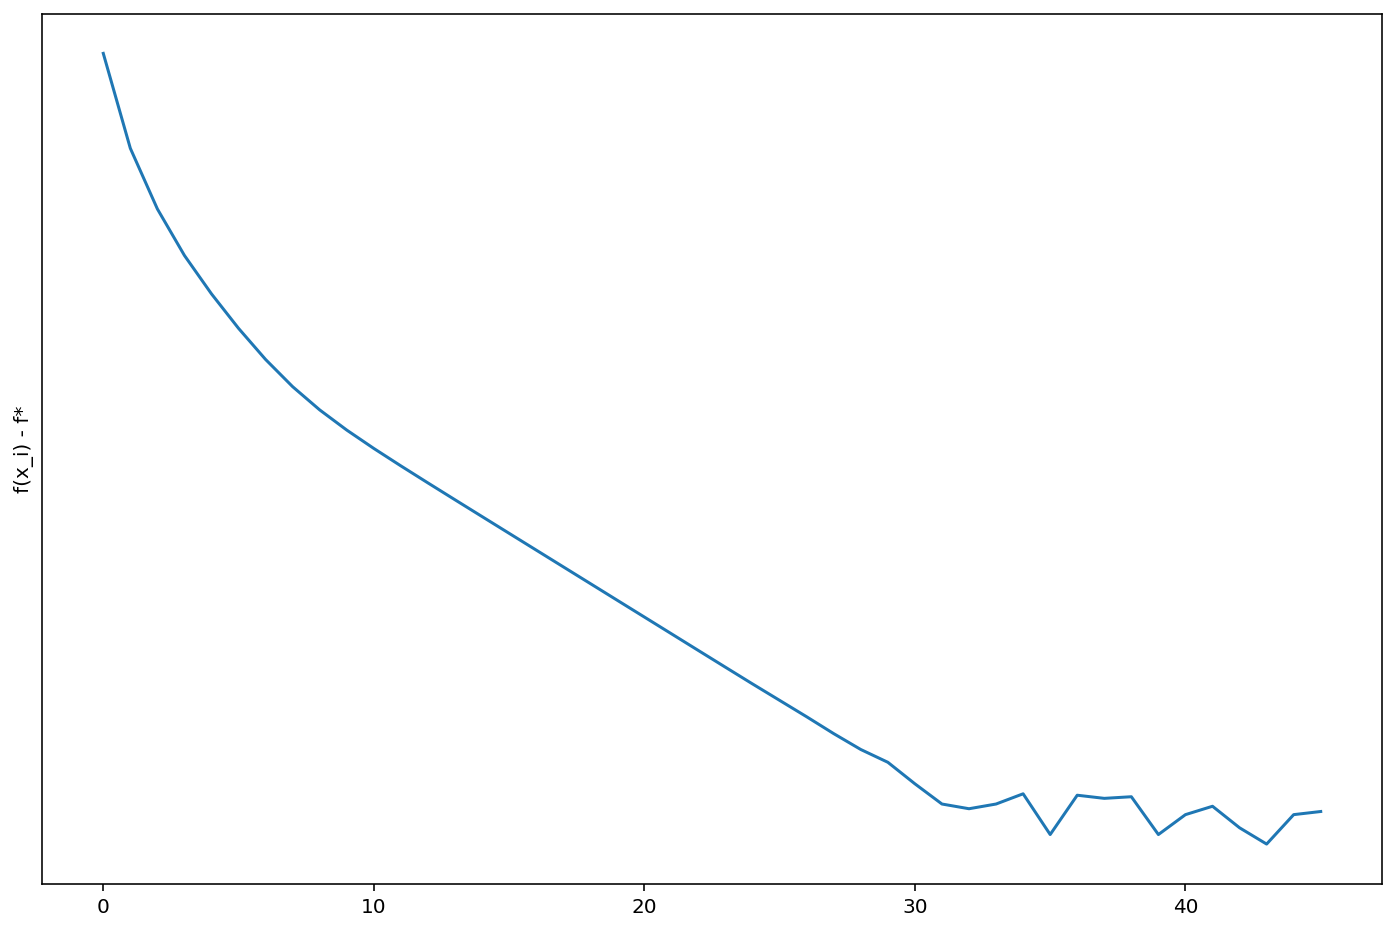

In [41]:
# fun eval (wrt proposed min) in log scale
mode = 'sparse'
diff_matrix = []
for exp in range(1, 11):
    d = np.array(data[mode]['fun_evals'][str(exp)], dtype=np.float64)
    diff = d[:-1]-d[-1]
    diff = diff[diff>0]
    diff_matrix.append(diff)
plot(np.log(diff)) # dist from "f*"
plt.ylabel('f(x_i) - f*')
plt.yticks([], [])

In [122]:
max_size = max([len(d) for d in diff_matrix])
matrix = np.zeros((10, max_size))
for i, d in enumerate(diff_matrix):
    d = np.array(d)
    matrix[i, 0:len(d)] = d

#matrix -= matrix.mean()
#matrix /= matrix.std()

In [123]:
np.count_nonzero(matrix[:, 40].reshape(-1, 1))

3

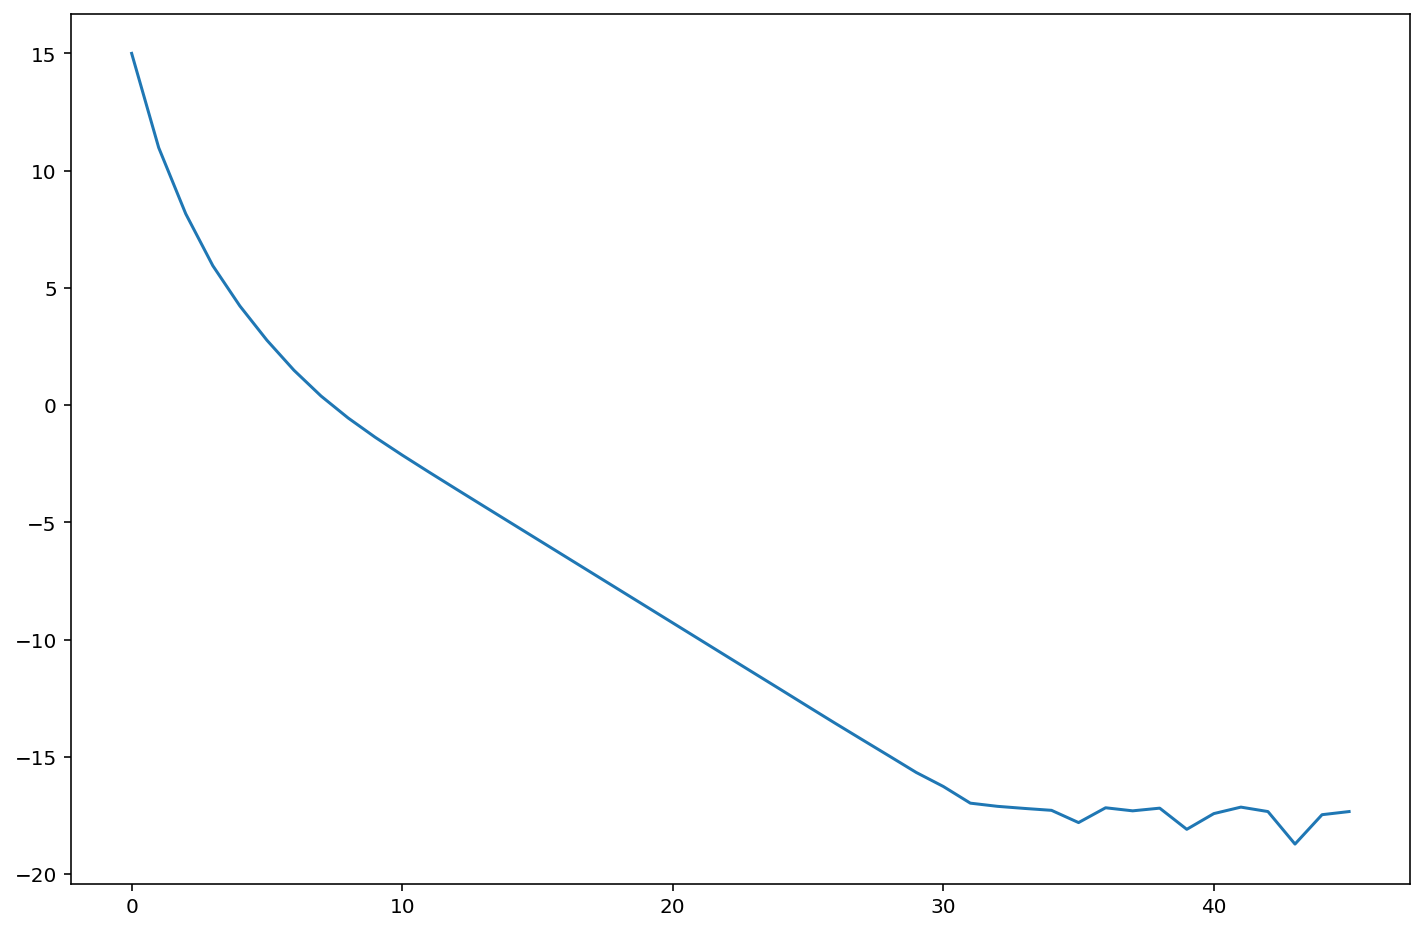

In [136]:
means = matrix.sum(axis=0)
for i in range(max_size):
    means[i] /= np.count_nonzero(matrix[:, i].reshape(-1, 1))
    
var = np.zeros(matrix.shape)
for i in range(10):
    for j in range(max_size):
        if matrix[i, j] != 0.0:
            var[i, j] = (matrix[i, j] - means[i])
var = var.sum(axis=0)
for i in range(max_size):
    var[i] /= np.count_nonzero(matrix[:, i].reshape(-1, 1))
plot(np.log(means))

In [135]:
print(means[1], var.mean())
print(matrix[:, 1]-means[1])
print(np.std(matrix, axis=0))

58813.98258782178 -316781.6718780942
[  2201.84477445  -8716.22881799 -23022.50059948 -21473.10715951
  43173.71797603 -12834.32626526  -7318.24885555  12858.74624282
  19517.50252869  -4387.3998242 ]
[4.54507425e+05 1.92865932e+04 1.28482019e+03 2.05800767e+02
 4.06447296e+01 7.79333790e+00 1.74724782e+00 8.13335281e-01
 4.59058721e-01 2.44410882e-01 1.24964865e-01 6.26149136e-02
 3.10615465e-02 1.53296494e-02 7.54449988e-03 3.70710183e-03
 1.81979143e-03 8.92770952e-04 4.37815471e-04 2.14654297e-04
 1.05215660e-04 5.15631368e-05 2.52732133e-05 1.23725780e-05
 6.07441838e-06 2.95601729e-06 1.45492518e-06 7.07176382e-07
 3.55694807e-07 1.57480672e-07 6.89128362e-08 3.06765838e-08
 2.57557422e-08 1.90099341e-08 2.02300757e-08 1.23553902e-08
 2.40879702e-08 1.86301764e-08 1.92889474e-08 7.49700211e-09
 1.38187684e-08 1.70266552e-08 1.36571398e-08 2.23517418e-09
 7.82310963e-09 8.94069672e-09]


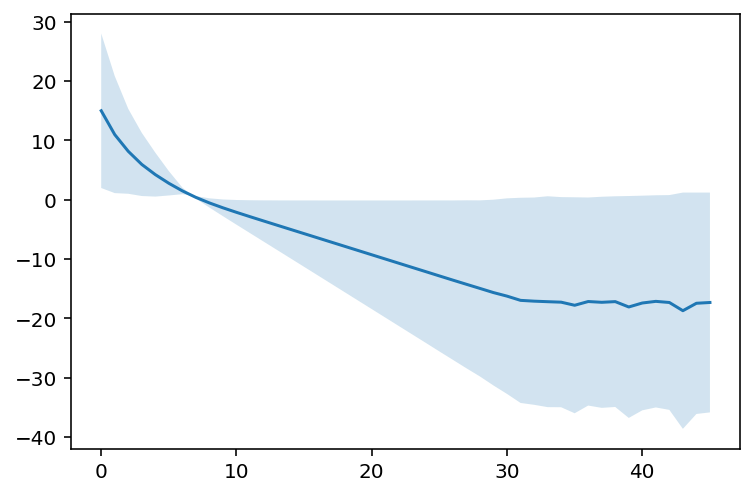

In [146]:
std = np.std(matrix, axis=0)
x = np.arange(max_size)
#fig, ax = plt.subplots()
plt.plot(x, np.log(means))
plt.fill_between(x, np.log(means) - np.log(std), np.log(means) + np.log(std), alpha=0.2)
#ax.plot(x, y, 'o', color='tab:brown')

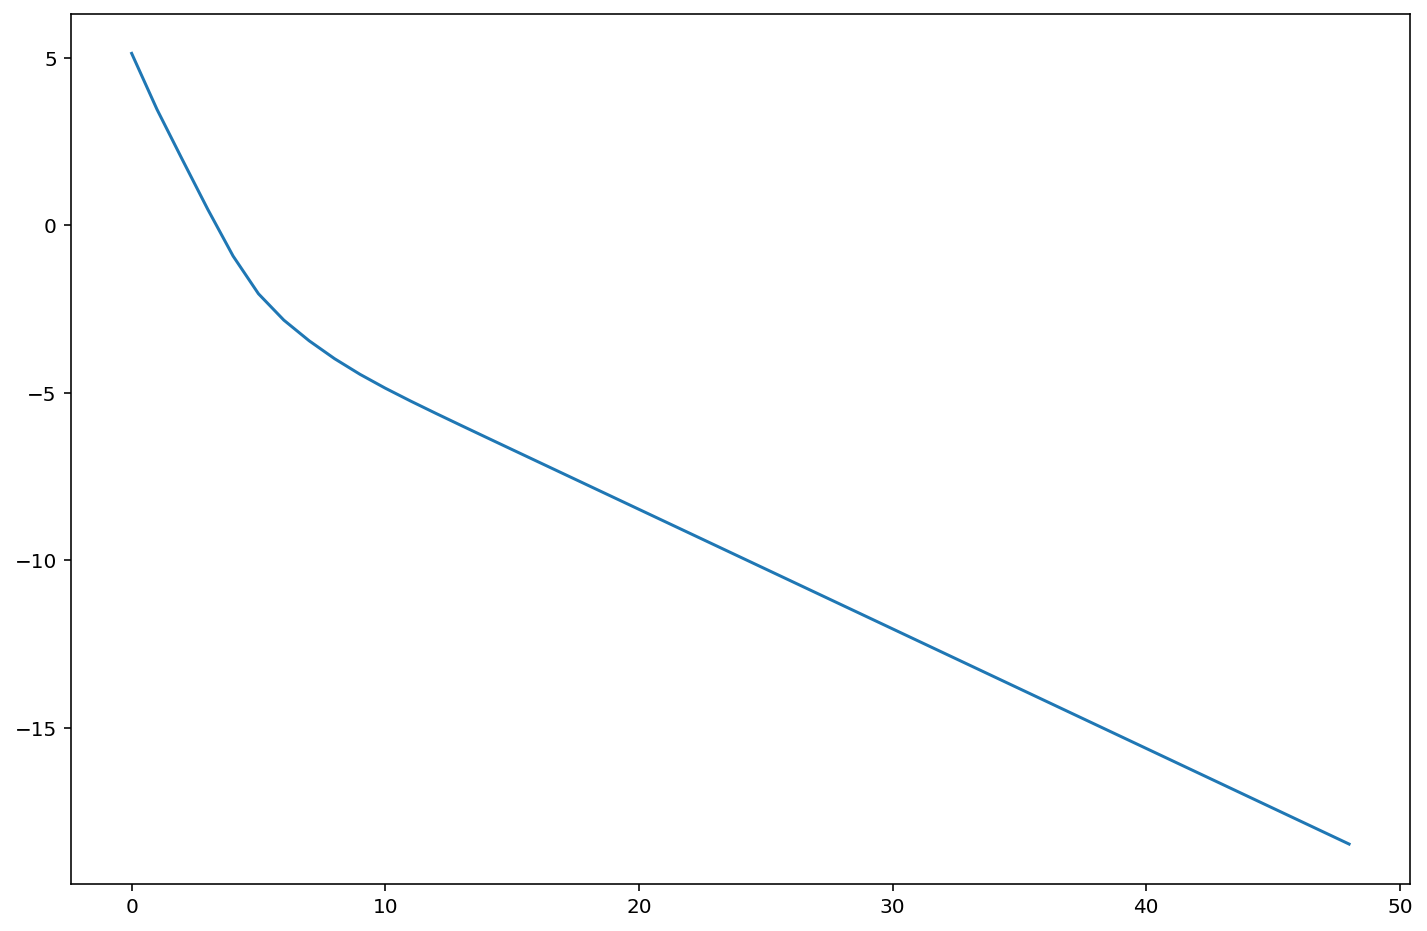

In [39]:
# grad theta
mode = 'sparse'
d = np.array(data[mode]['grad_theta']['1'], dtype=np.float64)
plot(np.log(d))

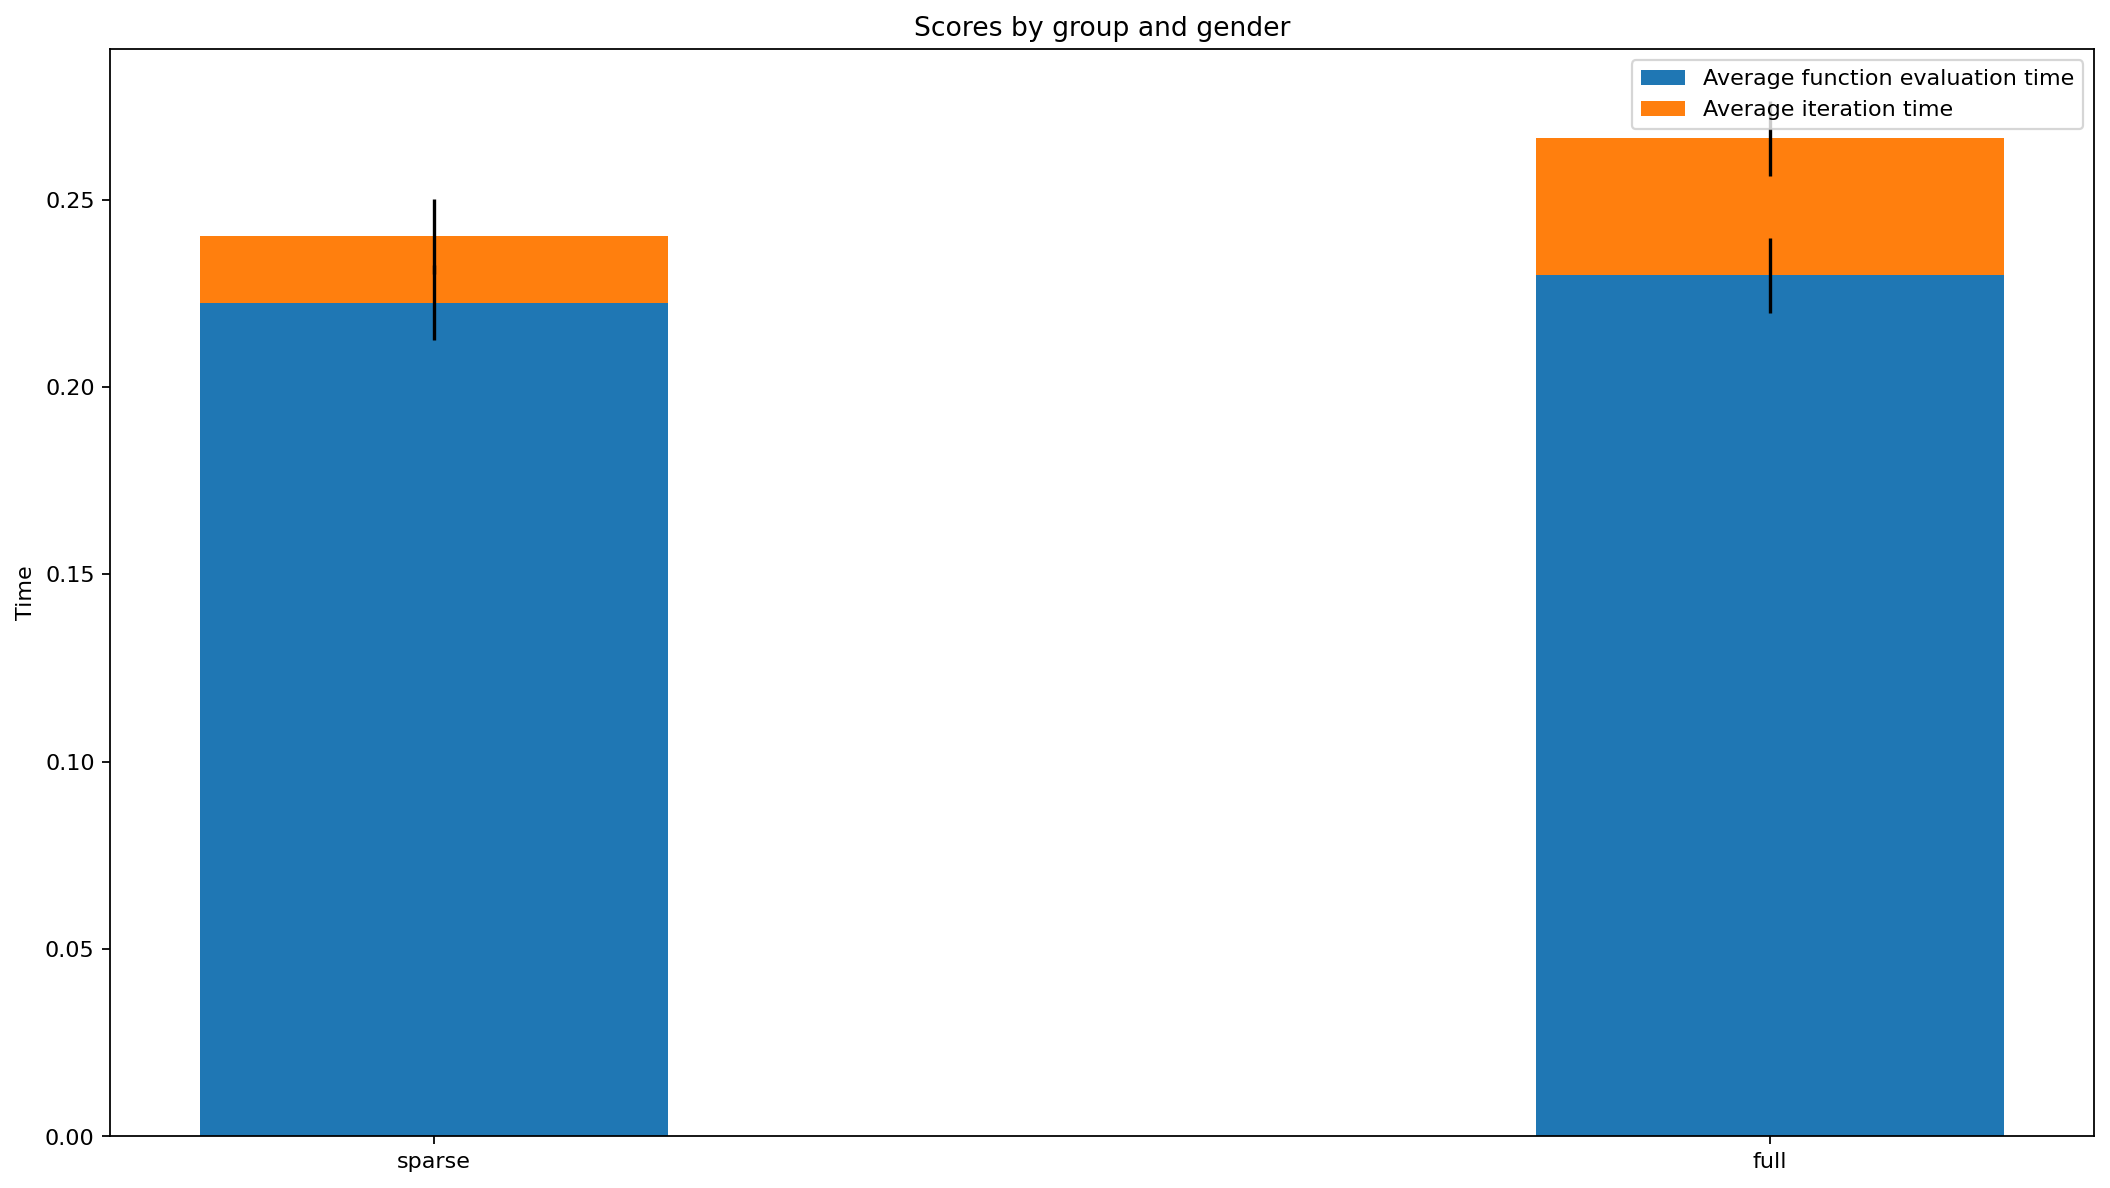

In [63]:
# time comparison (plot bar) DOESNT MAKE SENSE LIKE THIS FUN EVAL TIME IS COMPUTED OUTSIDE LOOP
plt.figure(figsize=(16,9), dpi= 80)

N = 2
colors = [plt.cm.Spectral(i*2/float(N-1)) for i in range(N)]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
fun_eval_time = [data[d]['avg_fun_eval_time'] for d in data]
avg_iter_time = [data[d]['avg_iter_time'] for d in data]

# std dev with error on y 
p1 = plt.bar(ind, avg_iter_time, width, yerr=[.01, .01])
p2 = plt.bar(ind, fun_eval_time, width,
             bottom=avg_iter_time, yerr=[.01, .01])

plt.ylabel('Time')
plt.title('Scores by group and gender')
plt.xticks(ind, [d for d in data])
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Average function evaluation time', 'Average iteration time'))

plt.show()



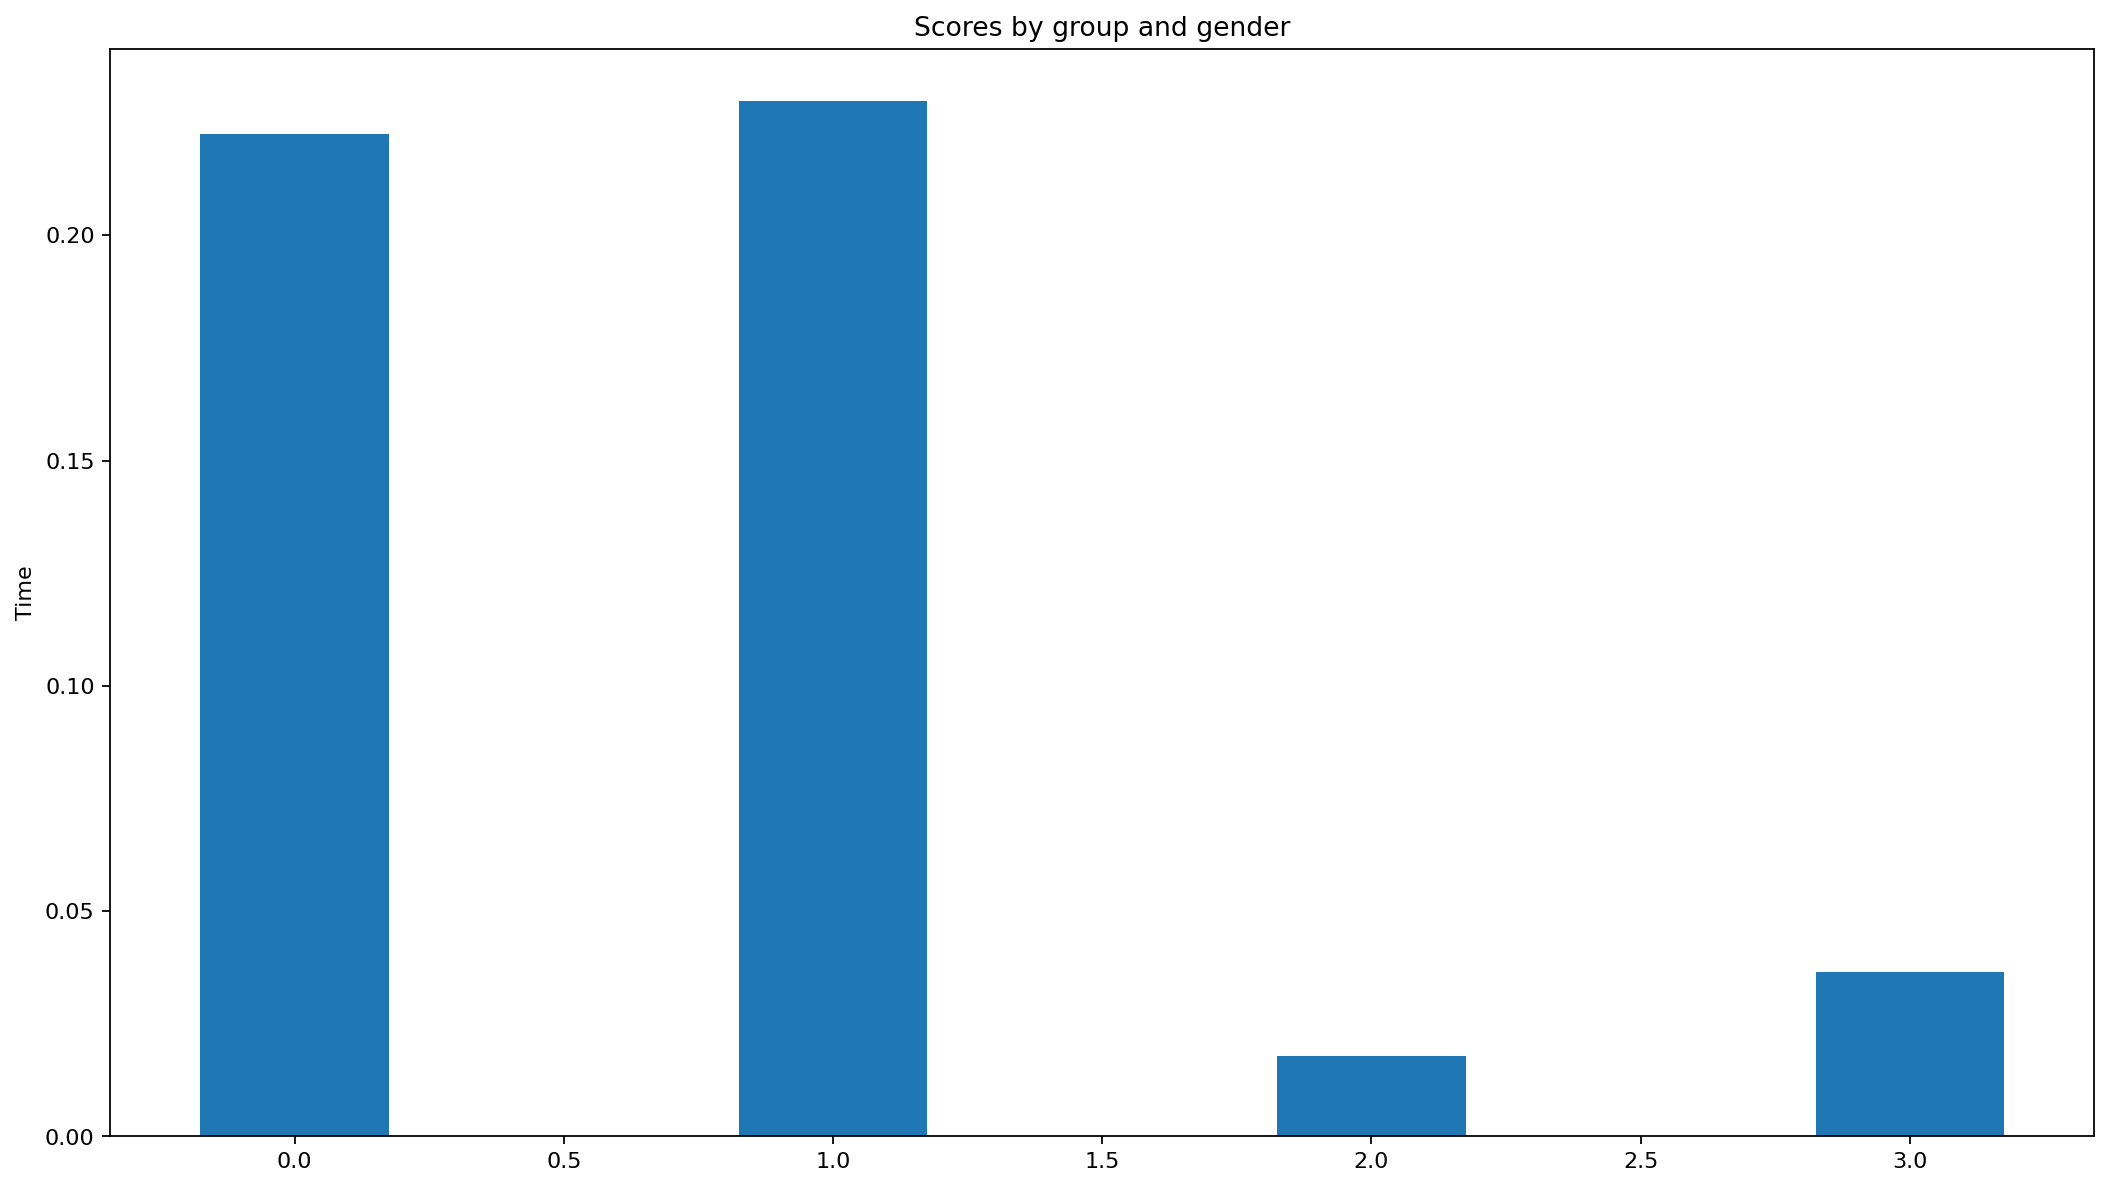

In [69]:
plt.figure(figsize=(16,9), dpi= 80)

N = 2
colors = [plt.cm.Spectral(i*2/float(N-1)) for i in range(N)]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
fun_eval_time = [data[d]['avg_fun_eval_time'] for d in data]
avg_iter_time = [data[d]['avg_iter_time'] for d in data]

# std dev with error on y 
plt.bar(range(4), avg_iter_time+fun_eval_time, width)

plt.ylabel('Time')
plt.title('Scores by group and gender')
# plt.xticks(ind, [d for d in data]+[d for d in data])
#plt.yticks(np.arange(0, 81, 10))
# plt.legend('Average function evaluation time', 'Average iteration time')


plt.show()

In [37]:
data

{'sparse': {'avg_iter_time': 0.22246254876602528,
  'total_convergence_time': 9.565889596939087,
  'avg_fun_eval_time': 0.01779701543408771,
  'num_iterations': 43,
  'grad_u_norm': 7.3349871207179064e-09,
  'theta_diff_norm': 1.0315224415817896e-07,
  'mse': 2.4672041318464553,
  'fun_evals': [273715.2324893616,
   238571.0391682576,
   237351.2659101513,
   237261.5811029897,
   237250.31048411474,
   237247.70322906214,
   237246.85413113868,
   237246.5430388609,
   237246.42453244317,
   237246.37868679548,
   237246.36082049974,
   237246.3538308609,
   237246.3510904393,
   237246.3500146626,
   237246.34959204908,
   237246.34942595623,
   237246.34936066298,
   237246.3493349914,
   237246.34932489714,
   237246.34932092775,
   237246.34931936685,
   237246.34931875297,
   237246.34931851158,
   237246.34931841667,
   237246.34931837936,
   237246.34931836464,
   237246.3493183589,
   237246.34931835663,
   237246.34931835573,
   237246.34931835535,
   237246.3493183553,
   23